# CRIPTOMONEDA
Una **criptomoneda** es una forma de dinero digital o virtual que utiliza criptografía para asegurar las transacciones y controlar la creación de nuevas unidades. A diferencia de las monedas tradicionales, las criptomonedas operan en una red descentralizada basada en la tecnología blockchain



<div style="text-align: center;">
  <img src="https://s2.coinmarketcap.com/static/img/coins/200x200/1.png" alt="BIT COIN">
</div>



# Análisis del Mercado de Criptomonedas
**Objetivos**

- Obtener datos en tiempo real sobre precios de criptomonedas, capitalización de mercado, volumen de comercio, y otras métricas relevantes.

In [15]:
import requests

def obtener_datos_completos_bitcoin():
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    params = {
        'vs_currency': 'usd',
        'ids': 'bitcoin'
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if data:
            bitcoin_data = data[0]
            precio = bitcoin_data['current_price']
            market_cap = bitcoin_data['market_cap']
            volumen_comercio = bitcoin_data['total_volume']
            maximo_24h = bitcoin_data['high_24h']
            minimo_24h = bitcoin_data['low_24h']
            cambio_porcentual_24h = bitcoin_data['price_change_percentage_24h']

            print(f'Precio actual de Bitcoin (USD): {precio}')
            print(f'Capitalización de mercado de Bitcoin (USD): {market_cap}')
            print(f'Volumen de comercio en 24h (USD): {volumen_comercio}')
            print(f'Máximo en 24h (USD): {maximo_24h}')
            print(f'Mínimo en 24h (USD): {minimo_24h}')
            print(f'Cambio porcentual en 24h: {cambio_porcentual_24h}%')
        else:
            print('No se pudo obtener los datos de Bitcoin.')
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
    except ValueError:
        print('Error al analizar la respuesta JSON.')

if __name__ == '__main__':
    obtener_datos_completos_bitcoin()


Precio actual de Bitcoin (USD): 57292
Capitalización de mercado de Bitcoin (USD): 1130697156754
Volumen de comercio en 24h (USD): 36336449484
Máximo en 24h (USD): 57880
Mínimo en 24h (USD): 55140
Cambio porcentual en 24h: 3.21981%


. Recopilar datos históricos para analizar tendencias y patrones en el mercado de criptomonedas.

Datos históricos de Bitcoin:
     timestamp         price
0   2024-06-29  60920.547590
1   2024-06-30  61401.992271
2   2024-07-01  63069.503840
3   2024-07-02  62478.677555
4   2024-07-03  60558.732426
5   2024-07-04  58325.957306
6   2024-07-05  55743.558473
7   2024-07-06  57027.000217
8   2024-07-07  57425.064368
9   2024-07-08  56195.935057
10  2024-07-09  56956.660875


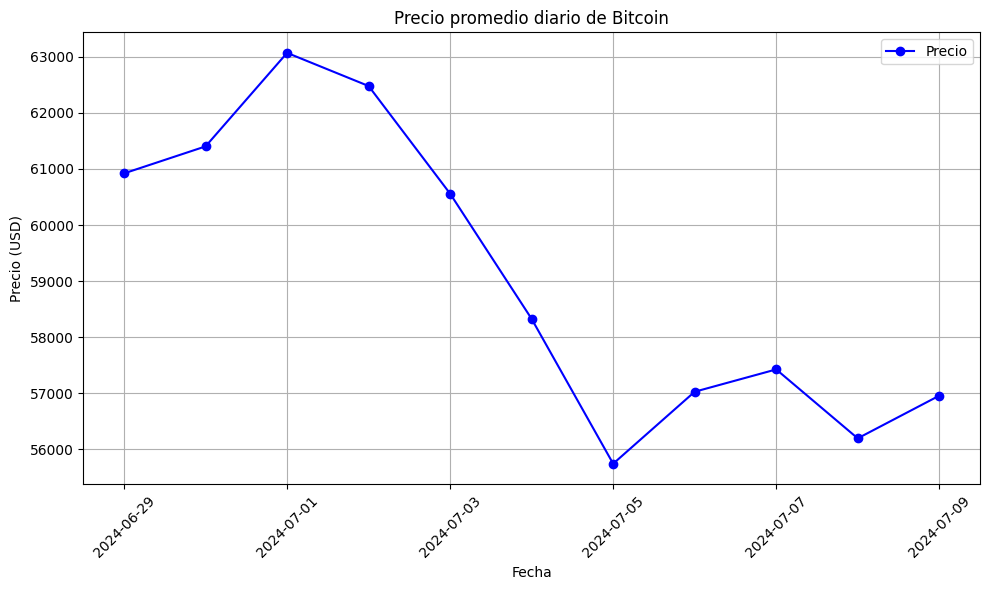

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def obtener_datos_historicos(symbol, days):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    
    # URL de la API 
    url = 'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range'
    params = {
        'vs_currency': 'usd',
        'from': int(start_date.timestamp()),
        'to': int(end_date.timestamp())
    }
    
    try:
       
        response = requests.get(url.format(symbol=symbol), params=params)
        response.raise_for_status()
        data = response.json()
        
        df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
        
        # Convertir la columna de timestamp a datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        
        # Redondear la columna de timestamp a la fecha por día
        df['timestamp'] = df['timestamp'].dt.date
        
        # Agrupar por fecha y obtener el precio promedio diario de Bitcoin
        df = df.groupby('timestamp', as_index=False)['price'].mean()
        
        # Guardar los datos en un archivo CSV
        csv_filename = f'{symbol}_historical_data.csv'
        df.to_csv(csv_filename, index=False)
        
        return df
    
    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud: {e}')
        return None
    except ValueError:
        print('Error al analizar la respuesta JSON.')
        return None

def graficar_datos(df):
    # Configurar el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['price'], marker='o', linestyle='-', color='b', label='Precio')
    plt.title('Precio promedio diario de Bitcoin')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Obtener datos históricos de Bitcoin 
    symbol = 'bitcoin'
    days = 10
    df_bitcoin = obtener_datos_historicos(symbol, days)
    
    if df_bitcoin is not None:
        print('Datos históricos de Bitcoin:')
        print(df_bitcoin)
        
        # Graficar los datos
        graficar_datos(df_bitcoin)
    else:
        print('No se pudieron obtener los datos históricos de Bitcoin.')

